In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
import seaborn as sns
from sklearn import preprocessing
sns.set()
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Daily trends

Here we combine the daily trips from the three transportation modes under study i.e. taxi, subway and biking.

In [24]:
daily_citibike_trips_df = pd.read_csv('final_data/daily_citibike_trips.csv')
daily_subway_trips_df = pd.read_csv('final_data/daily_subway_trips.csv')
daily_tlc_trips_df = pd.read_csv('final_data/tlc_date_merged.csv')

In [25]:
daily_tlc_trips_df.rename(columns={'Pickups':'Taxi_Pickups','Dropoffs':'Taxi_Dropoffs'},inplace=True)
daily_citibike_trips_df.rename(columns={'startdate':'date','exits':'citibike_exits','entries':'citibike_entries'},inplace=True)
daily_subway_trips_df.rename(columns={'date_time':'date','ENTRIES':'subway_entries','EXITS':'subway_exits'},inplace=True)

In [26]:
daily_tlc_trips_df.head()

,Unnamed: 0,date,FHV_Pickup,FHV_Dropoff,Green_Pickup,Green_Dropoff,Yellow_Pickup,Yellow_Dropoff,Taxi_Pickups,Taxi_Dropoffs
0,0,2018-01-01,1099,780,18,74,15,77,1132,931
1,1,2018-01-02,638,645,8,94,5,75,651,814
2,2,2018-01-03,814,874,141,160,60,330,1015,1364
3,3,2018-01-04,396,412,4,36,3,32,403,480
4,4,2018-01-05,907,873,17,129,11,95,935,1097


In [28]:
daily_citibike_trips_df.head()

,Unnamed: 0,date,citibike_exits,citibike_entries
0,0,2018-04-01,98,103
1,1,2018-04-02,60,62
2,2,2018-04-03,89,74
3,3,2018-04-04,87,89
4,4,2018-04-05,108,121


In [29]:
dfs = [daily_citibike_trips_df, daily_subway_trips_df, daily_tlc_trips_df]

In [53]:
df_final_daily = reduce(lambda left,right: pd.merge(left,right,on='date'), dfs)

In [54]:
df_final_daily.columns

Index(['Unnamed: 0_x', 'date', 'citibike_exits', 'citibike_entries',
       'Unnamed: 0_y', 'subway_entries', 'subway_exits', 'dow', 'Unnamed: 0',
       'FHV_Pickup', 'FHV_Dropoff', 'Green_Pickup', 'Green_Dropoff',
       'Yellow_Pickup', 'Yellow_Dropoff', 'Taxi_Pickups', 'Taxi_Dropoffs'],
      dtype='object')

In [55]:
df_final_daily = df_final_daily[['date', 'citibike_exits', 'citibike_entries','subway_entries', 'subway_exits','FHV_Pickup',\
          'FHV_Dropoff', 'Green_Pickup', 'Green_Dropoff',\
          'Yellow_Pickup', 'Yellow_Dropoff', 'Taxi_Pickups', 'Taxi_Dropoffs']]
df_final_daily['date'] = pd.to_datetime(df_final_daily['date'])

(array([736815., 736846., 736876., 736907., 736938., 736968., 736999.]),
 <a list of 7 Text xticklabel objects>)

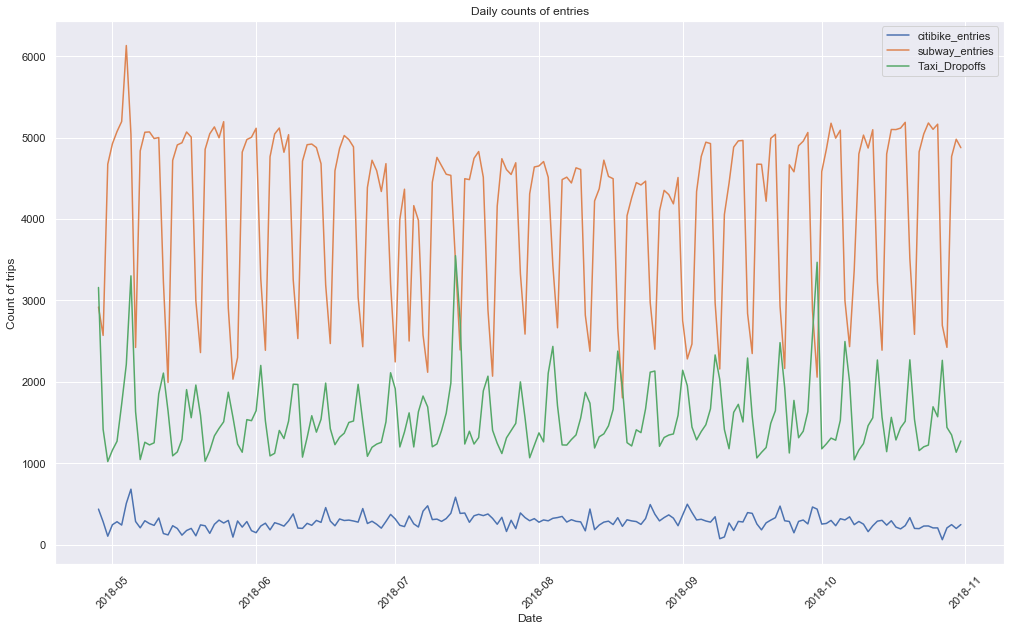

In [165]:
plt.figure(figsize=(17,10))
plt.plot(df_final_daily[df_final_daily['date']<'2018-11-01'].date, df_final_daily[df_final_daily['date']<'2018-11-01'].citibike_entries)
plt.plot(df_final_daily[df_final_daily['date']<'2018-11-01'].date, df_final_daily[df_final_daily['date']<'2018-11-01'].subway_entries)
plt.plot(df_final_daily[df_final_daily['date']<'2018-11-01'].date, df_final_daily[df_final_daily['date']<'2018-11-01'].Taxi_Dropoffs)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Count of trips')
plt.title("Daily counts of entries")
plt.xticks(rotation='45')

(array([736815., 736846., 736876., 736907., 736938., 736968., 736999.]),
 <a list of 7 Text xticklabel objects>)

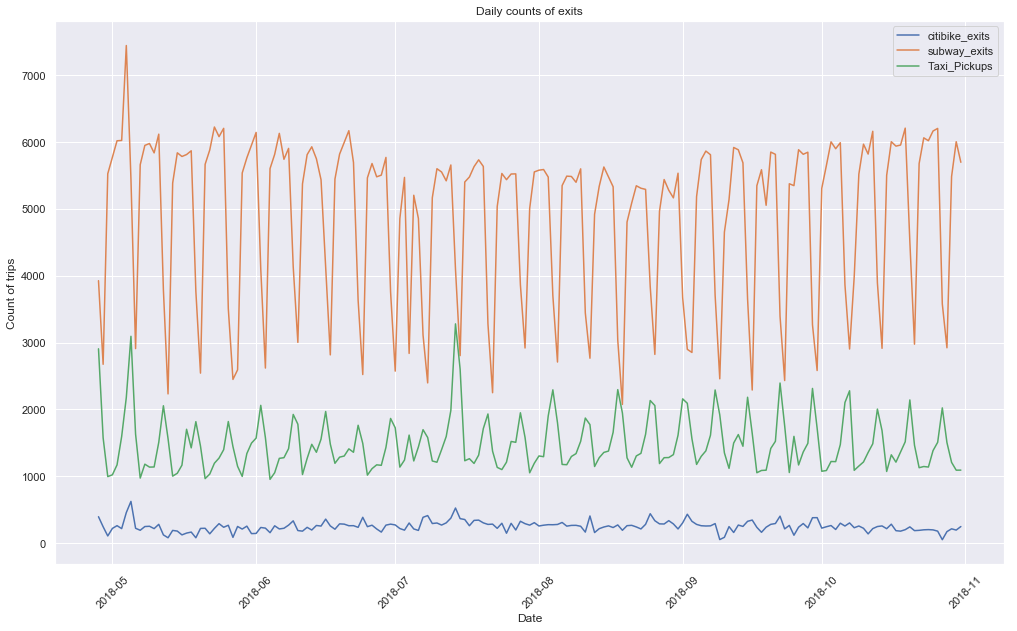

In [166]:
plt.figure(figsize=(17,10))
plt.plot(df_final_daily[df_final_daily['date']<'2018-11-01'].date, df_final_daily[df_final_daily['date']<'2018-11-01'].citibike_exits)
plt.plot(df_final_daily[df_final_daily['date']<'2018-11-01'].date, df_final_daily[df_final_daily['date']<'2018-11-01'].subway_exits)
plt.plot(df_final_daily[df_final_daily['date']<'2018-11-01'].date, df_final_daily[df_final_daily['date']<'2018-11-01'].Taxi_Pickups)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Count of trips')
plt.title("Daily counts of exits")
plt.xticks(rotation='45')

We notice that subway trips is generally higher than taxi trips and citibike is much lower than both.

## Hourly trends

We then get the data aggregated by hours from each of the sources and combine them into a single visualization.

In [51]:
hourly_citibike_trips_df = pd.read_csv('final_data/hourly_citibike_trips.csv')
hourly_subway_trips_df = pd.read_csv('final_data/hourly_subway_data.csv')
hourly_tlc_trips_df = pd.read_csv('final_data/tlc_hour_merged.csv')

In [62]:
hourly_subway_trips_df

,Unnamed: 0,hour,subway_entries,subway_exits
0,0,0,406.223140,511.847107
1,1,4,69.851695,123.682203
2,2,8,460.934426,760.122951
3,3,12,1000.330579,1179.148760
4,4,16,944.148148,1064.263374
5,5,20,1254.602459,1300.270492


In [61]:
hourly_tlc_trips_df.rename(columns={'puHour':'hour','Pickups':'Taxi_Pickups','Dropoffs':'Taxi_Dropoffs'},inplace=True)
hourly_citibike_trips_df.rename(columns={'starthour':'hour','exits':'citibike_exits','entries':'citibike_entries'},inplace=True)
hourly_subway_trips_df.rename(columns={'ENTRIES':'subway_entries','EXITS':'subway_exits'},inplace=True)

Since the number of trips is varying in each of the datasets we normalize each of the datasets to visualize them all together.

In [123]:
hourly_citibike_trips_df['citibike_entries'] = preprocessing.scale(hourly_citibike_trips_df.citibike_entries)
hourly_citibike_trips_df['citibike_exits'] = preprocessing.scale(hourly_citibike_trips_df.citibike_exits)
hourly_tlc_trips_df['Taxi_Dropoffs'] = preprocessing.scale(hourly_tlc_trips_df.Taxi_Dropoffs)
hourly_tlc_trips_df['Taxi_Pickups'] = preprocessing.scale(hourly_tlc_trips_df.Taxi_Pickups)
hourly_subway_trips_df['subway_entries'] = preprocessing.scale(hourly_subway_trips_df.subway_entries)
hourly_subway_trips_df['subway_exits'] = preprocessing.scale(hourly_subway_trips_df.subway_exits)

C:\Users\siddh\Anaconda3\envs\kaggle\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\siddh\Anaconda3\envs\kaggle\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\siddh\Anaconda3\envs\kaggle\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\siddh\Anaconda3\envs\kaggle\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


(array([-5.,  0.,  5., 10., 15., 20., 25.]),
 <a list of 7 Text xticklabel objects>)

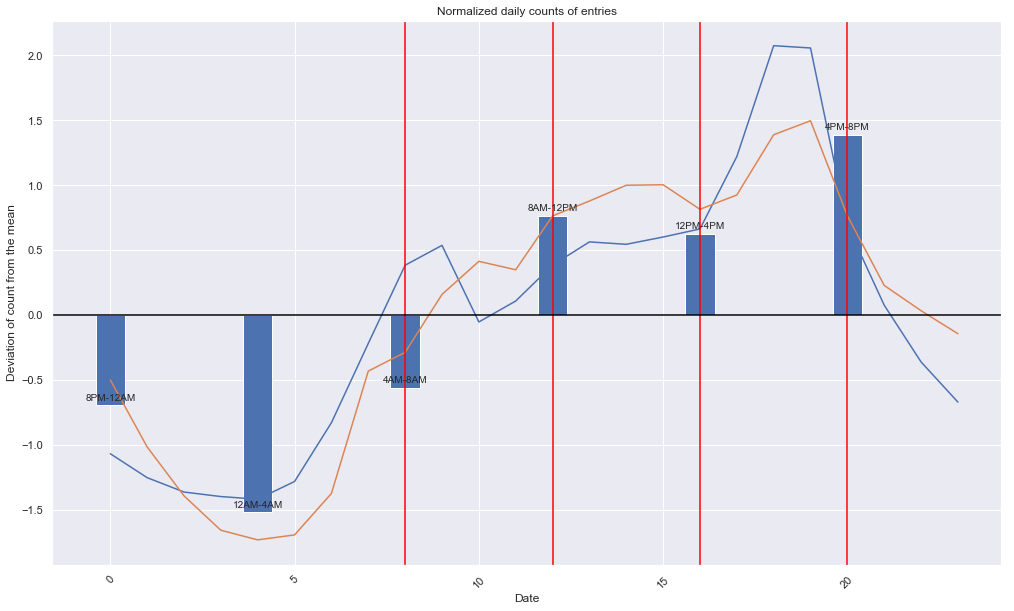

In [168]:
plt.figure(figsize=(17,10))
plt.plot(hourly_citibike_trips_df.hour, hourly_citibike_trips_df.citibike_entries)
plt.plot(hourly_tlc_trips_df.hour, hourly_tlc_trips_df.Taxi_Dropoffs)
rects = plt.bar(hourly_subway_trips_df.hour,hourly_subway_trips_df.subway_entries, label='subway')
plt.xlabel('Date')
plt.ylabel('Deviation of count from the mean')
plt.title("Normalized daily counts of entries")
plt.axvline(x=8, color='red')
plt.axvline(x=12, color='red')
plt.axvline(x=16, color='red')
plt.axvline(x=20, color='red')
plt.axhline(y=0, color='black')

def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    labels = ['8PM-12AM','12AM-4AM','4AM-8AM','8AM-12PM','12PM-4PM','4PM-8PM']
    i=0
    for rect in rects:
        height = rect.get_height()
        label = labels[i]
        i = i + 1
        plt.annotate(label.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


autolabel(rects)
# plt.axvline(x='8',color='red')
# plt.axvline(x='10',color='red')
# plt.axvline(x='16:40:00',color='red')
# plt.axvline(x='19:00:00',color='red')
plt.xticks(rotation='45')

(array([-5.,  0.,  5., 10., 15., 20., 25.]),
 <a list of 7 Text xticklabel objects>)

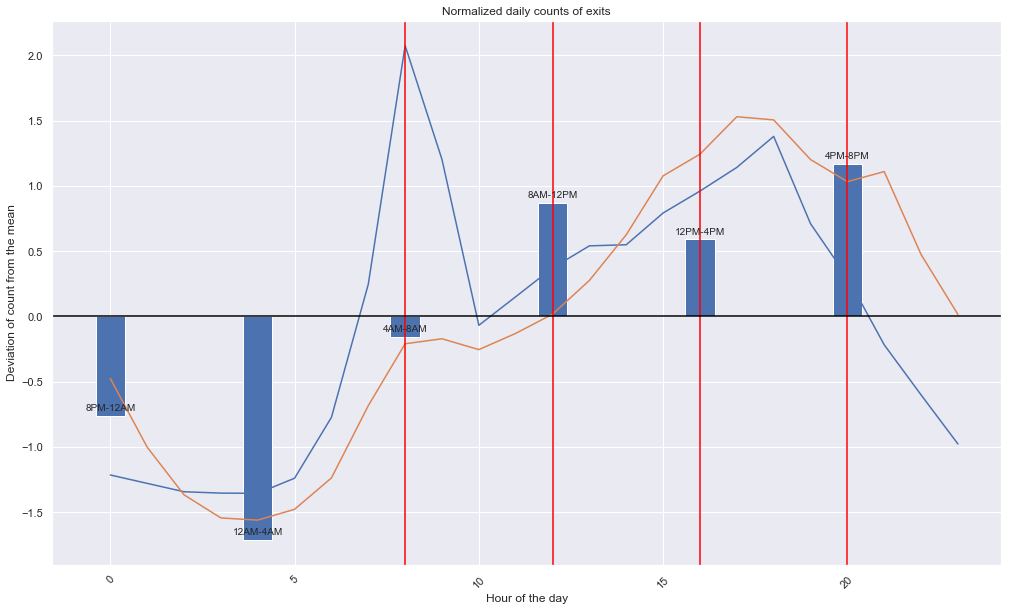

In [167]:
plt.figure(figsize=(17,10))
plt.plot(hourly_citibike_trips_df.hour, hourly_citibike_trips_df.citibike_exits)
plt.plot(hourly_tlc_trips_df.hour, hourly_tlc_trips_df.Taxi_Pickups)
rects = plt.bar(hourly_subway_trips_df.hour,hourly_subway_trips_df.subway_exits)
plt.xlabel('Hour of the day')
plt.ylabel('Deviation of count from the mean')
plt.title("Normalized daily counts of exits")
plt.axvline(x=8, color='red')
plt.axvline(x=12, color='red')
plt.axvline(x=16, color='red')
plt.axvline(x=20, color='red')
plt.axhline(y=0, color='black')

def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    labels = ['8PM-12AM','12AM-4AM','4AM-8AM','8AM-12PM','12PM-4PM','4PM-8PM']
    i=0
    for rect in rects:
        height = rect.get_height()
        label = labels[i]
        i = i + 1
        plt.annotate(label.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


autolabel(rects)
# plt.axvline(x='8',color='red')
# plt.axvline(x='10',color='red')
# plt.axvline(x='16:40:00',color='red')
# plt.axvline(x='19:00:00',color='red')
plt.xticks(rotation='45')

## American Community Survey Data

We extracted the numbers from the 2017 ACS to get a split of each transport mode.

In [153]:
#different modes of transport from ACS
total = 'B08006_001E' #Estimate!!Total
drive = 'B08006_002E' #Estimate!!Total!!Car truck or van
car_truck_alone = 'B08006_003E' #Estimate!!Total!!Car truck or van!!Drove alone
car_truck_carpool = 'B08006_004E' #Estimate!!Total!!Car truck or van!!Carpooled
public_transport = 'B08006_008E' #Estimate!!Total!!Public transportation (excluding taxicab)
subway = 'B08006_011E' #Estimate!!Total!!Public transportation (excluding taxicab)!!Subway or elevated
ferry = 'B08006_013E' #Estimate!!Total!!Public transportation (excluding taxicab)!!Ferryboat
bus = 'B08006_009E' #Estimate!!Total!!Public transportation (excluding taxicab)!!Bus or trolley bus
biking = 'B08006_014E' #Estimate!!Total!!Bicycle
walked = 'B08006_015E' #Estimate!!Total!!Walked
taxi = 'B08006_016E' #Estimate!!Total!!Taxicab motorcycle or other means
work_from_home = 'B08006_017E' #Estimate!!Total!!Worked at home

In [154]:
transport_acs = pd.read_json('https://api.census.gov/data/2017/acs/acs5?get='+
                             total +','+
                             drive +','+
                             car_truck_alone +','+
                             car_truck_carpool +','+
                             public_transport +','+
                             subway +','+
                             ferry +','+
                             bus+','+
                             biking +','+
                             walked +','+
                             taxi +','+
                             work_from_home +','+
                             'NAME&for=tract:005300,005900,008500&in=county:047&in=state:36')

In [155]:
transport_acs.columns = transport_acs.iloc[0]
transport_acs.drop([0], axis=0,inplace=True)
transport_acs.rename(columns={'B08006_001E':'total','B08006_002E':'drive','B08006_003E':'car_truck_alone'\
                             , 'B08006_004E':'car_truck_carpool','B08006_008E':'public_transport',\
                             'B08006_011E':'subway','B08006_013E':'ferry','B08006_014E':'biking',\
                             'B08006_015E':'walked','B08006_016E':'taxi','B08006_017E':'work_from_home',\
                             'B08006_009E':'bus'},inplace=True)

In [156]:
transport_acs.head()

,total,drive,car_truck_alone,car_truck_carpool,public_transport,subway,ferry,bus,biking,walked,taxi,work_from_home,NAME,state,county,tract
1,1775,241,152,89,1236,1002,0,234,16,249,33,0,"Census Tract 85, Kings County, New York",36,047,008500
2,863,88,78,10,445,348,0,91,105,96,6,123,"Census Tract 59, Kings County, New York",36,047,005900
3,1373,283,192,91,574,439,0,135,180,220,5,111,"Census Tract 53, Kings County, New York",36,047,005300


In [181]:
all_transportation_fields = ['total','drive','subway','ferry','biking','walked','taxi','work_from_home','bus']
transportation_fields = ['drive','subway','ferry','biking','walked','taxi','work_from_home','bus']

In [182]:
for i in all_transportation_fields:
    transport_acs[i] = pd.to_numeric(transport_acs[i])

In [183]:
transport_acs[transportation_fields].sum()

0
drive              612
subway            1789
ferry                0
biking             301
walked             565
taxi                44
work_from_home     234
bus                460
dtype: int64

Populating the interactive namespace from numpy and matplotlib


([<matplotlib.patches.Wedge at 0x1ca7bb34908>,
 [Text(0.9756621003450459, 0.5080191590386075, 'drive'),
  Text(-0.7834406897900015, 0.77215327855379, 'subway'),
  Text(-0.8919430054881902, -0.6437683395140634, 'ferry'),
  Text(-0.7166047514284969, -0.8345523531990682, 'biking'),
  Text(-0.03321501599773741, -1.0994984141472284, 'walked'),
  Text(0.47599456876329005, -0.9916799738362421, 'taxi'),
  Text(0.6792655922509959, -0.86521572754077, 'work_from_home'),
  Text(1.0291637106155092, -0.38835815525377665, 'bus')],
 [Text(0.532179327460934, 0.27710135947560405, '15.3%'),
  Text(-0.4273312853400008, 0.4211745155747945, '44.7%'),
  Text(-0.48651436662992187, -0.35114636700767093, '0.0%'),
  Text(-0.3908753189609983, -0.45521037447221896, '7.5%'),
  Text(-0.01811728145331131, -0.59972640771667, '14.1%'),
  Text(0.2596334011436127, -0.5409163493652229, '1.1%'),
  Text(0.3705085048641795, -0.4719358513858745, '5.8%'),
  Text(0.5613620239720959, -0.21183172104751452, '11.5%')])

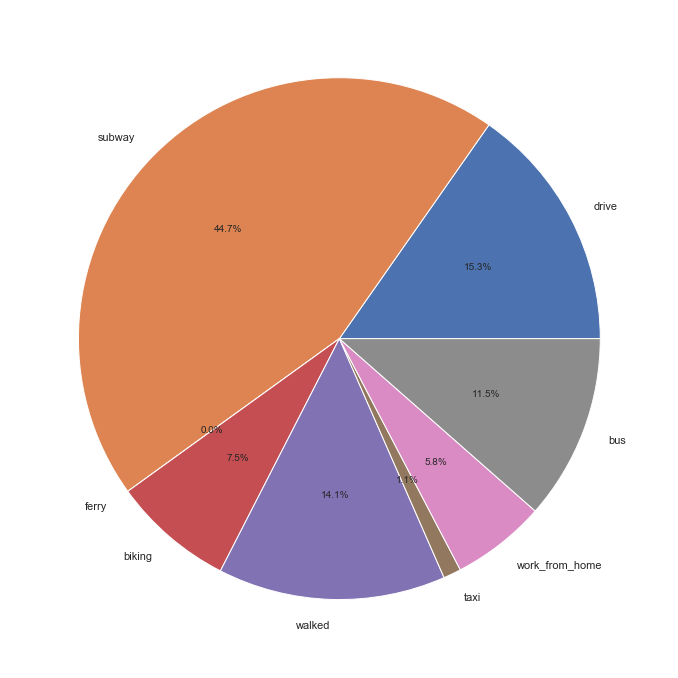

In [184]:
import matplotlib.pyplot as plt
%pylab inline
plt.figure(figsize=(12,12))
plt.pie(transport_acs[transportation_fields].sum(),labels=transportation_fields,autopct='%1.1f%%')

In [186]:
transport_acs['taxi'].sum()/transport_acs['total'].sum()

0.010969832959361756

In [187]:
transport_acs['subway'].sum()/transport_acs['total'].sum()

0.44602343555223134

In [188]:
transport_acs['biking'].sum()/transport_acs['total'].sum()

0.07504363001745201